# Problem Statement

    Goal it is your job to predict the sales Price for each   House.For each id in the test set,you must Predict the value of the Sale Price Variable.

    Metric Sumbission are evaluated on Mean_Squared_Error(MSE).Submission File Format The File should a header and have the following Format:


        Id,SalePrice
        1461,169000.1
        1462,187724.1233
        1463,175221

# Read Dataset

In [49]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [50]:
trd = pd.read_csv("E:AI/26th_lecure_8_1_2023_Lasso_Ridge/training_set.csv")
trd.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [51]:
tsd = pd.read_csv("E:AI/26th_lecure_8_1_2023_Lasso_Ridge/testing_set.csv")

In [52]:
tsd.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


# Profile

In [53]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Missing Data Treatment

In [55]:
trd.Alley = trd.Alley.fillna("None")
trd.BsmtQual = trd.BsmtQual.fillna("None")
trd.BsmtCond = trd.BsmtCond.fillna("None")
trd.BsmtExposure = trd.BsmtExposure.fillna("None")
trd.BsmtFinType1 = trd.BsmtFinType1.fillna("None")
trd.BsmtFinType2 = trd.BsmtFinType2.fillna("None")
trd.FireplaceQu = trd.FireplaceQu.fillna("None")
trd.GarageType = trd.GarageType.fillna("None")
trd.GarageFinish = trd.GarageFinish.fillna("None")
trd.GarageQual = trd.GarageQual.fillna("None")
trd.GarageCond = trd.GarageCond.fillna("None")
trd.PoolQC = trd.PoolQC.fillna("None")
trd.Fence = trd.Fence.fillna("None")
trd.MiscFeature = trd.MiscFeature.fillna("None")

In [56]:
tsd.Alley = tsd.Alley.fillna("None")
tsd.BsmtQual = tsd.BsmtQual.fillna("None")
tsd.BsmtCond = tsd.BsmtCond.fillna("None")
tsd.BsmtExposure = tsd.BsmtExposure.fillna("None")
tsd.BsmtFinType1 = tsd.BsmtFinType1.fillna("None")
tsd.BsmtFinType2 = tsd.BsmtFinType2.fillna("None")
tsd.FireplaceQu = tsd.FireplaceQu.fillna("None")
tsd.GarageType = tsd.GarageType.fillna("None")
tsd.GarageFinish = tsd.GarageFinish.fillna("None")
tsd.GarageQual = tsd.GarageQual.fillna("None")
tsd.GarageCond = tsd.GarageCond.fillna("None")
tsd.PoolQC = tsd.PoolQC.fillna("None")
tsd.Fence = tsd.Fence.fillna("None")
tsd.MiscFeature = tsd.MiscFeature.fillna("None")

In [57]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [58]:
tsd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [59]:
con = []
cat = []
for i in trd.columns:
    if(trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [60]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [61]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [62]:
con.remove("SalePrice")

In [63]:
Q = list(trd[con].nunique().sort_values().index[0:15])

In [64]:
for i in Q:
    x = trd[i].mode()[0]
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)
for i in con:
    x = trd[i].mean()
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)

In [65]:
trd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [66]:
tsd.isna().sum()

Id                0
MSSubClass        0
MSZoning          4
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


# Outliers

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)

In [68]:
out = []
for i in con:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)

In [69]:
from numpy import unique
outliers = list(unique(out))

In [70]:
trd = trd.drop(index=outliers,axis=0)
trd.shape

(1021, 81)

In [71]:
trd.index = range(0,1021,1)

# EDA

In [72]:
Q = pd.DataFrame(trd.corr()['SalePrice'].sort_values())
imp_cons = list(Q[(Q.SalePrice>0.1)][Q.SalePrice!=1].index)

In [73]:
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_row",1000)

In [74]:
trd.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.020242,-0.030431,0.018702,-0.027721,-0.004094,0.003189,-0.011628,-0.039991,0.017634,0.005182,-0.009700,0.009442,0.013480,-0.036503,0.036278,-0.023528,0.021656,NaN,-0.006502,-0.004399,-0.013664,NaN,-0.019073,0.033524,0.001464,0.016491,0.013520,-0.026729,-0.025037,-0.005583,0.013849,0.022322,NaN,-0.052747,0.040720,-0.011341,-0.017510
MSSubClass,0.020242,1.000000,-0.514555,-0.493796,0.129392,-0.092931,0.180344,0.133691,0.077869,-0.090725,0.002391,-0.150394,-0.274598,-0.335537,0.338455,0.135394,0.062274,-0.015661,NaN,0.138682,0.274551,-0.177361,NaN,-0.055404,0.009980,0.162918,0.007307,-0.072695,0.007798,0.033508,-0.069679,-0.026355,-0.044030,NaN,-0.056204,-0.026958,-0.010458,-0.039278
LotFrontage,-0.030431,-0.514555,1.000000,0.587723,0.236785,-0.030323,0.158646,0.098952,0.142012,0.164178,-0.016602,0.139117,0.340295,0.397616,0.029861,-0.108046,0.330686,0.059085,NaN,0.187146,0.036398,0.317130,NaN,0.333324,0.237445,0.097015,0.309305,0.352496,0.124053,0.148172,-0.032950,-0.004469,0.038889,NaN,0.027332,0.018847,-0.005443,0.393167
LotArea,0.018702,-0.493796,0.587723,1.000000,0.165487,-0.050157,0.078966,0.036063,0.094867,0.164704,-0.007972,0.095402,0.292022,0.377532,0.104766,-0.069123,0.385962,0.061409,NaN,0.214760,0.082684,0.394382,NaN,0.396745,0.270011,0.046517,0.274265,0.303957,0.161698,0.103357,-0.028610,0.009203,0.054572,NaN,0.041863,0.006784,-0.023665,0.375229
OverallQual,-0.027721,0.129392,0.236785,0.165487,1.000000,-0.199101,0.642205,0.579849,0.395691,0.177431,-0.145150,0.318738,0.536612,0.468163,0.290422,0.025510,0.630244,0.097973,NaN,0.651438,0.252850,0.158536,NaN,0.484298,0.361741,0.570743,0.628635,0.572942,0.254988,0.368716,-0.174879,-0.002120,-0.036709,NaN,-0.062806,0.086265,-0.026022,0.811464
OverallCond,-0.004094,-0.092931,-0.030323,-0.050157,-0.199101,1.000000,-0.428017,-0.036611,-0.141509,-0.007047,0.069280,-0.155321,-0.173474,-0.130688,-0.059842,-0.021263,-0.156184,0.010030,NaN,-0.272791,-0.067848,-0.033622,NaN,-0.105626,-0.067719,-0.362293,-0.232718,-0.189539,-0.050943,-0.108280,0.125183,-0.016517,0.098973,NaN,0.115964,-0.017797,0.061718,-0.163107
YearBuilt,0.003189,0.180344,0.158646,0.078966,0.642205,-0.428017,1.000000,0.672210,0.316469,0.207281,-0.077542,0.193245,0.438374,0.318269,0.123616,0.041344,0.359518,0.178954,NaN,0.610043,0.247761,0.039693,NaN,0.235394,0.160699,0.835552,0.598085,0.528597,0.256899,0.312126,-0.419853,0.032017,-0.101093,NaN,-0.096455,0.015634,-0.025268,0.621181
YearRemodAdd,-0.011628,0.133691,0.098952,0.036063,0.579849,-0.036611,0.672210,1.000000,0.186596,0.080302,-0.142158,0.230897,0.327471,0.277387,0.164664,0.026555,0.366595,0.126234,NaN,0.539280,0.202360,0.021041,NaN,0.268097,0.104776,0.663358,0.483657,0.415544,0.214399,0.310675,-0.218821,0.029965,-0.052396,NaN,-0.079589,0.013997,0.015556,0.558499
MasVnrArea,-0.039991,0.077869,0.142012,0.094867,0.395691,-0.141509,0.316469,0.186596,1.000000,0.234584,-0.052471,0.081590,0.344573,0.320530,0.103626,-0.039852,0.341647,0.117138,NaN,0.266710,0.139118,0.099153,NaN,0.263491,0.231213,0.251829,0.358352,0.350318,0.183876,0.142476,-0.146581,-0.020149,-0.031106,NaN,-0.051780,0.023884,0.006867,0.423312
BsmtFinSF1,0.017634,-0.090725,0.164178,0.164704,0.177431,-0.007047,0.207281,0.080302,0.234584,1.000000,0.005836,-0.595629,0.423368,0.368091,-0.178756,-0.063505,0.113056,0.699811,NaN,0.054444,-0.059679,-0.060168,NaN,0.018953,0.184307,0.125510,0.191992,0.254169,0.196839,0.059106,-0.110641,-0.029955,0.040327,NaN,-0.009854,-0.011988,0.045014,0.367335


In [75]:
len(cat)

43

In [76]:
73/4

18.25

        import matplotlib.pyplot as plt
        import seaborn as sb


        plt.figure(figsize=(10,40))
        x = 0
        for i in cat:
             x = x + 1
             plt.subplot(19,4,x)
             sb.boxplot(trd[i],trd.SalePrice)

# Data Preparation

In [77]:
trd[con].head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008


In [78]:
trd[cat].head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)
X2 = pd.get_dummies(trd[cat])
Xnew = X1.join(X2)

X11 = pd.DataFrame(ss.fit_transform(tsd[con]),columns=con)
X21 = pd.get_dummies(tsd[cat])
Xnew_test = X11.join(X21)
len(X2.columns),len(X21.columns)

(237, 248)

In [80]:
Xnew_test[Xnew.columns]

KeyError: "['Condition2_RRNn', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'GarageQual_Ex'] not in index"

In [81]:
Q = ['Condition2_RRNn', 'Exterior1st_ImStucc', 
     'Exterior2nd_Other', 'Heating_Floor', 'GarageQual_Ex']

In [82]:
for i in Q:
    Xnew_test[i]=0

#  splitting 

In [83]:
Y = trd["SalePrice"]
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Regression Models

In [84]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(239169314.78, 4.034163769047695e+29)

# Backward Elemination OLS models

In [85]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()

In [86]:
rsq = round(ols.rsquared_adj,4)

In [87]:
col_to_drop = ols.pvalues.sort_values().index[-1]

In [88]:
RS = []
for i in range(0,169,1):
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    RS.append(rsq)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if(col_to_drop=="const"):
        col_to_drop = ols.pvalues.sort_values().index[-2]
    else:
        col_to_drop = ols.pvalues.sort_values().index[-1]

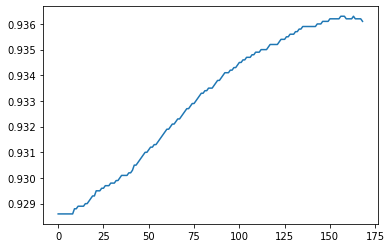

In [89]:
import matplotlib.pyplot as plt
plt.plot(RS)

In [90]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(255281521.33, 371487463.86)

In [91]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

In [92]:
modeller(lm)

(255281521.33, 371487463.86)

# Regularize

In [93]:
from sklearn.linear_model import Ridge,Lasso

In [94]:
rr = Ridge(alpha=1)
modeller(rr)

(261361909.75, 332451927.27)

In [95]:
q = 0.0
alphas = []
for i in range(0,500):
    q = round(q + 0.1,2)
    alphas.append(q)

In [96]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    tr_err,ts_err = modeller(rr)
    tr.append(tr_err)
    ts.append(ts_err)

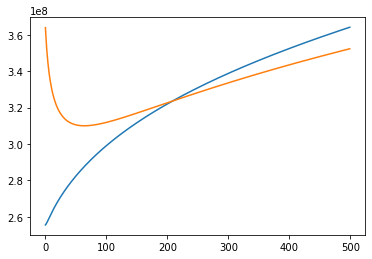

In [97]:
plt.plot(tr)
plt.plot(ts)

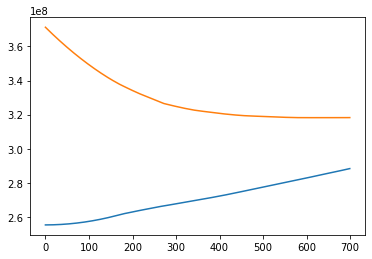

In [98]:
q = 0.0
alphas = []
for i in range(0,700):
    q = round(q + 0.1,2)
    alphas.append(q)
tr = []
ts = []
for i in alphas:
    ls = Lasso(alpha = i)
    tr_err,ts_err = modeller(ls)
    tr.append(tr_err)
    ts.append(ts_err)
plt.plot(tr)
plt.plot(ts)

In [40]:
(371487463.86 - 255281521.33)

116205942.53

In [41]:
alphas[500]

50.1

In [99]:
ls = Lasso(alpha = 50.1)
modeller(ls)

(277470190.54, 318925245.12)

In [100]:
from sklearn.model_selection import GridSearchCV
ls = Lasso()
tg = {"alpha":alphas}

cv = GridSearchCV(ls,tg,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 39.5}

# Fine Model

In [101]:
ls = Lasso(alpha=10.0)
model = ls.fit(Xnew,Y)

# Data Preparation for prediction

In [102]:
final_df_pred = Xnew_test[Xnew.columns]

In [103]:
pred = model.predict(final_df_pred)

In [104]:
Q = tsd[["Id"]]
Q["SalePrice"] = pred

In [48]:
Q.to_csv("Desktop/submission.csv")